In [62]:
import pandas as pd
import numpy as np 
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn  import linear_model

from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import r2_score
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV




In [63]:
credit = pd.read_csv('/Users/moramoga/Documents/Big Data/Course 5 /Task#1/default of credit card clients 2.csv', header =0)


In [64]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Unnamed: 0                    30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null int64
AugustPay                     30000 non-null int64
JulyPay                       30000 non-null int64
JunePay                       30000 non-null int64
MayPay                        30000 non-null int64
AprilPay                      30000 non-null int64
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null int64
AprilBill               

In [65]:
#drop a column that was automtically created with no value
credit.drop('Unnamed: 0', axis = 1, inplace =True) # drop column "ID"


In [66]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
SeptemberPay                  30000 non-null int64
AugustPay                     30000 non-null int64
JulyPay                       30000 non-null int64
JunePay                       30000 non-null int64
MayPay                        30000 non-null int64
AprilPay                      30000 non-null int64
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null int64
AprilBill                     30000 non-null int64
SeptemberPayment        

In [67]:
#changing variables from int to category
credit = credit.astype({"SEX":'category', "EDUCATION":'category', "MARRIAGE":'category',"SeptemberPay":'category',"AugustPay":'category',"JulyPay":'category',"JunePay":'category',"MayPay":'category',"AprilPay":'category',"MARRIAGE":'category',"default payment next month":'category',"AGE":'category'}) 


In [68]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
SeptemberPay                  30000 non-null category
AugustPay                     30000 non-null category
JulyPay                       30000 non-null category
JunePay                       30000 non-null category
MayPay                        30000 non-null category
AprilPay                      30000 non-null category
SeptemberBill                 30000 non-null int64
AugustBill                    30000 non-null int64
JulyBill                      30000 non-null int64
JuneBill                      30000 non-null int64
MayBill                       30000 non-null int64
AprilBill                     30000 non-null 

In [69]:
#credit['AGE'] = pd.qcut(credit['AGE'], q=4)


In [70]:
#features - Here I selected only the demographic data plus the payment history
features = credit.iloc[:,1:10]
print('Summary of feature sample')
features.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,MayPay
0,2,2,1,24,2,2,-1,-1,-2
1,2,2,2,26,-1,2,0,0,0
2,2,2,2,34,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0


In [71]:
#dependent variable
depVar = credit['default payment next month']

In [72]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,SEX,EDUCATION,MARRIAGE,AGE,SeptemberPay,AugustPay,JulyPay,JunePay,MayPay
0,2,2,1,24,2,2,-1,-1,-2
1,2,2,2,26,-1,2,0,0,0
2,2,2,2,34,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0


In [73]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [74]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
      SEX EDUCATION MARRIAGE AGE SeptemberPay AugustPay JulyPay JunePay MayPay
29900   1         2        2  29            0         0      -2      -2     -2
29901   1         2        2  29            1         2       0       0      0
29902   1         3        2  30            0        -1       0       0      0
29903   1         1        1  30           -1         0      -1      -1     -1
29904   1         3        2  30            0         0       0       0      0


In [75]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features,depVar)



In [77]:
X_train.shape, X_test.shape



((22500, 9), (7500, 9))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((16875, 9), (5625, 9))

In [79]:
#Models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()

In [80]:

modelSVC.fit(X_train,y_train)







SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
modelRF.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

from sklearn.model_selection import cross_val_score



In [83]:
print(cross_val_score(modelSVC, X_train, y_train)) 



[0.78311111 0.78340741 0.77866667 0.78014815 0.77955556]


In [84]:
print(cross_val_score(modelKNN, X_train, y_train)) 


[0.79111111 0.79022222 0.78903704 0.78962963 0.78251852]


In [85]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.78162963 0.78962963 0.78044444 0.78607407 0.77659259]


In [86]:
#Model Fitting
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)


[0.78311111 0.78340741 0.77866667 0.78014815 0.77955556]


0.7818074074074074

In [87]:
#Model Fitting
modelKNN.fit(X_train,y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)


[0.79111111 0.79022222 0.78903704 0.78962963 0.78251852]


0.8369777777777778

In [88]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.78340741 0.78933333 0.7757037  0.78874074 0.77777778]


0.911525925925926

In [89]:
RF_predict = modelRF.predict(X_test)
KNN_predict = modelKNN.predict(X_test)
SVC_predict = modelSVC.predict(X_test)



In [90]:

accuracy_score(y_test, RF_predict)

0.7930666666666667

In [91]:
#this is the model with the best fit 
accuracy_score(y_test, KNN_predict)

0.7912888888888889

In [92]:
accuracy_score(y_test, SVC_predict)

0.7834666666666666

In [93]:
# Python script for confusion matrix creation. 
from sklearn import metrics
  

print (metrics.classification_report(y_test, KNN_predict) )

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4391
           1       0.54      0.35      0.42      1234

    accuracy                           0.79      5625
   macro avg       0.69      0.63      0.65      5625
weighted avg       0.77      0.79      0.77      5625



In [94]:
#Tuned models- starting this point I will tuned the models used previously to determine if there is an improvement in the accuracy of the models.
#modelSVC = SVC()
modelRFTuned = RandomForestClassifier( n_estimators = 100, min_samples_split = 10)
#modelKNN = KNeighborsClassifier()

In [95]:
modelRFTuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
print(cross_val_score(modelRFTuned, X_train, y_train)) 

[0.8082963  0.81037037 0.80651852 0.81096296 0.80296296]


In [97]:
#Model Fitting RF
modelRFTuned.fit(X_train,y_train)
print(cross_val_score(modelRFTuned, X_train, y_train))
modelRFTuned.score(X_train,y_train)

[0.81007407 0.81096296 0.80740741 0.80977778 0.80355556]


0.8603259259259259

In [98]:
RF_predict2 = modelRFTuned.predict(X_test)


In [99]:
#with the tuned model I can see an increase in the accuracy from 80 to 81
accuracy_score(y_test, RF_predict2)

0.8147555555555556

In [100]:
#Tuning SVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   6.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   5.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.777, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   4.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.803, total=   4.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.812, total=   4.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=  11.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.817, total=   9.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.812, total=   8.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.816, total=   8.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.809, total=   9.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.811, total=   5.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.806, total=   5.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  7.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [101]:
SVM_predict2 = grid.predict(X_test)


In [102]:
grid.score(X_train,y_train)

0.8303407407407407

In [103]:
#accuracy of the tuned SVM model

accuracy_score(y_test, SVM_predict2)

0.8163555555555555

In [104]:
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
modelKNNFit = GridSearchCV(modelKNN, param_grid=parameters)
modelKNNFit.fit(X_train,y_train)
modelKNNFit.score(X_train,y_train)

0.8298666666666666

In [107]:
KNN_predict2 = modelKNNFit.predict(X_test)

In [108]:
#accuracy of the tuned KNN model
accuracy_score(y_test, KNN_predict2)

0.7987555555555556

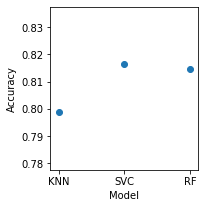

In [116]:
#plotting the accuracy of the tuned models

knnplot=accuracy_score(y_test, KNN_predict2)
svmplot=accuracy_score(y_test, SVM_predict2)
rfplot=accuracy_score(y_test, RF_predict2)
names = ['KNN', 'SVC', 'RF']
values = [knnplot, svmplot, rfplot]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.scatter(names, values)